In [1]:
# Clone repos we need
!git clone https://github.com/Jan-Oliver/profaile-pic-dev.git
!git clone https://github.com/huggingface/diffusers.git

Cloning into 'profaile-pic-dev'...
remote: Enumerating objects: 98, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 98 (delta 1), reused 6 (delta 1), pack-reused 90
Unpacking objects: 100% (98/98), done.
Cloning into 'diffusers'...
remote: Enumerating objects: 15999, done.
remote: Counting objects: 100% (375/375), done.
remote: Compressing objects: 100% (221/221), done.
remote: Total 15999 (delta 207), reused 257 (delta 130), pack-reused 15624
Receiving objects: 100% (15999/15999), 10.94 MiB | 31.29 MiB/s, done.
Resolving deltas: 100% (10992/10992), done.


In [2]:
# Handle all of the dependencies
!pip install git+https://github.com/huggingface/transformers.git
!cd /content/profaile-pic-dev && chmod +x dreambooth/setup_dreambooth_env.sh
!cd /content/profaile-pic-dev && dreambooth/setup_dreambooth_env.sh
!cd /content/profaile-pic-dev && chmod +x inference/setup_inference_env.sh
!cd /content/profaile-pic-dev && inference/setup_inference_env.sh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-len0efj2
  Running command git clone -q https://github.com/huggingface/transformers.git /tmp/pip-req-build-len0efj2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 7.6 MB 4.7 MB/s 
     |████████████████████████████████| 182 kB 90.5 MB/s 
  Created wheel for transformers: filename=transformers-4.26.0.dev0-py3-none-any.whl size=6029499 sha256=21bc8f191ed777e7d2f03fd7d54a9040bd1b5777cf9b2caed7acc594d0f63502
  Stored in directory: /tmp/pip-ephem-wheel-cache-ozp5daxr/wheels/05/0a/97/64ae47c27ba95fae2cb5838e7b4b7247a34d4a8ba5f7092de2
Successfully built transformers
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████

In [12]:
import requests
from PIL import Image
from io import BytesIO
from diffusers import StableDiffusionUpscalePipeline, DDIMScheduler

import torch

# load model and scheduler
model_id = "stabilityai/stable-diffusion-x4-upscaler"
scheduler = DDIMScheduler.from_pretrained(model_id ,subfolder="scheduler")
pipeline = StableDiffusionUpscalePipeline.from_pretrained(model_id, scheduler=scheduler ,revision="fp16", torch_dtype=torch.float16)
pipeline = pipeline.to("cuda")

Fetching 14 files:   0%|          | 0/14 [00:00<?, ?it/s]

In [13]:
pipeline.enable_attention_slicing()
pipeline.set_use_memory_efficient_attention_xformers(True)

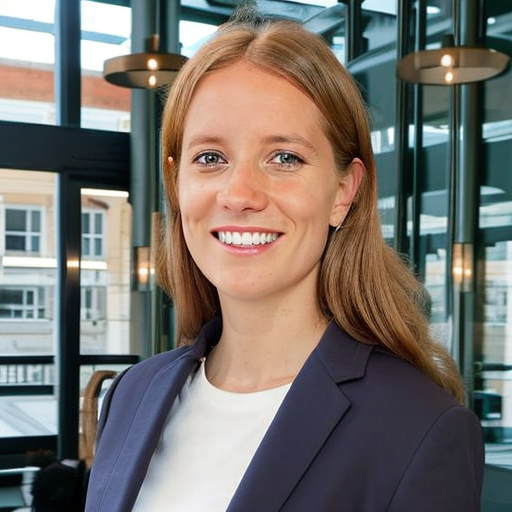

In [16]:
# let's download an  image
#url = "https://huggingface.co/datasets/hf-internal-testing/diffusers-images/resolve/main/sd2-upscale/low_res_cat.png"
#response = requests.get(url)
#low_res_img = Image.open(BytesIO(response.content)).convert("RGB")
low_res_img = Image.open("/content/lea.png").convert("RGB")
low_res_img

In [17]:
#low_res_img = low_res_img.resize((128, 128))
prompt = "Highly detailed" #portrait of man in a blue suit from the front, front view, closeup, centered frame, symmetric, studio lighting, clear and realistic face, uhd faces, pexels, 85mm, casual pose, 35mm film roll photo, hard light, detailed skin texture, masterpiece, sharp focus, pretty, lovely, adorable, attractive, hasselblad, candid street portrait"
negative_prompt = "blender, ugly, multiple hands, bad anatomy, bad proportions, unrealistic, full body, cropped, lowres, poorly drawn face, out of frame, poorly drawn hands, double, blurred, disfigured, deformed, repetitive, black and white"
nb_iterations = 150
cfg_scale = 8
guidance_scale = 10
noise_level = 10

result = pipeline(prompt=prompt,  num_inference_steps=nb_iterations, negative_prompt=negative_prompt, noise_level=noise_level, guidance_scale=cfg_scale, image=low_res_img).images[0]

  0%|          | 0/150 [00:00<?, ?it/s]

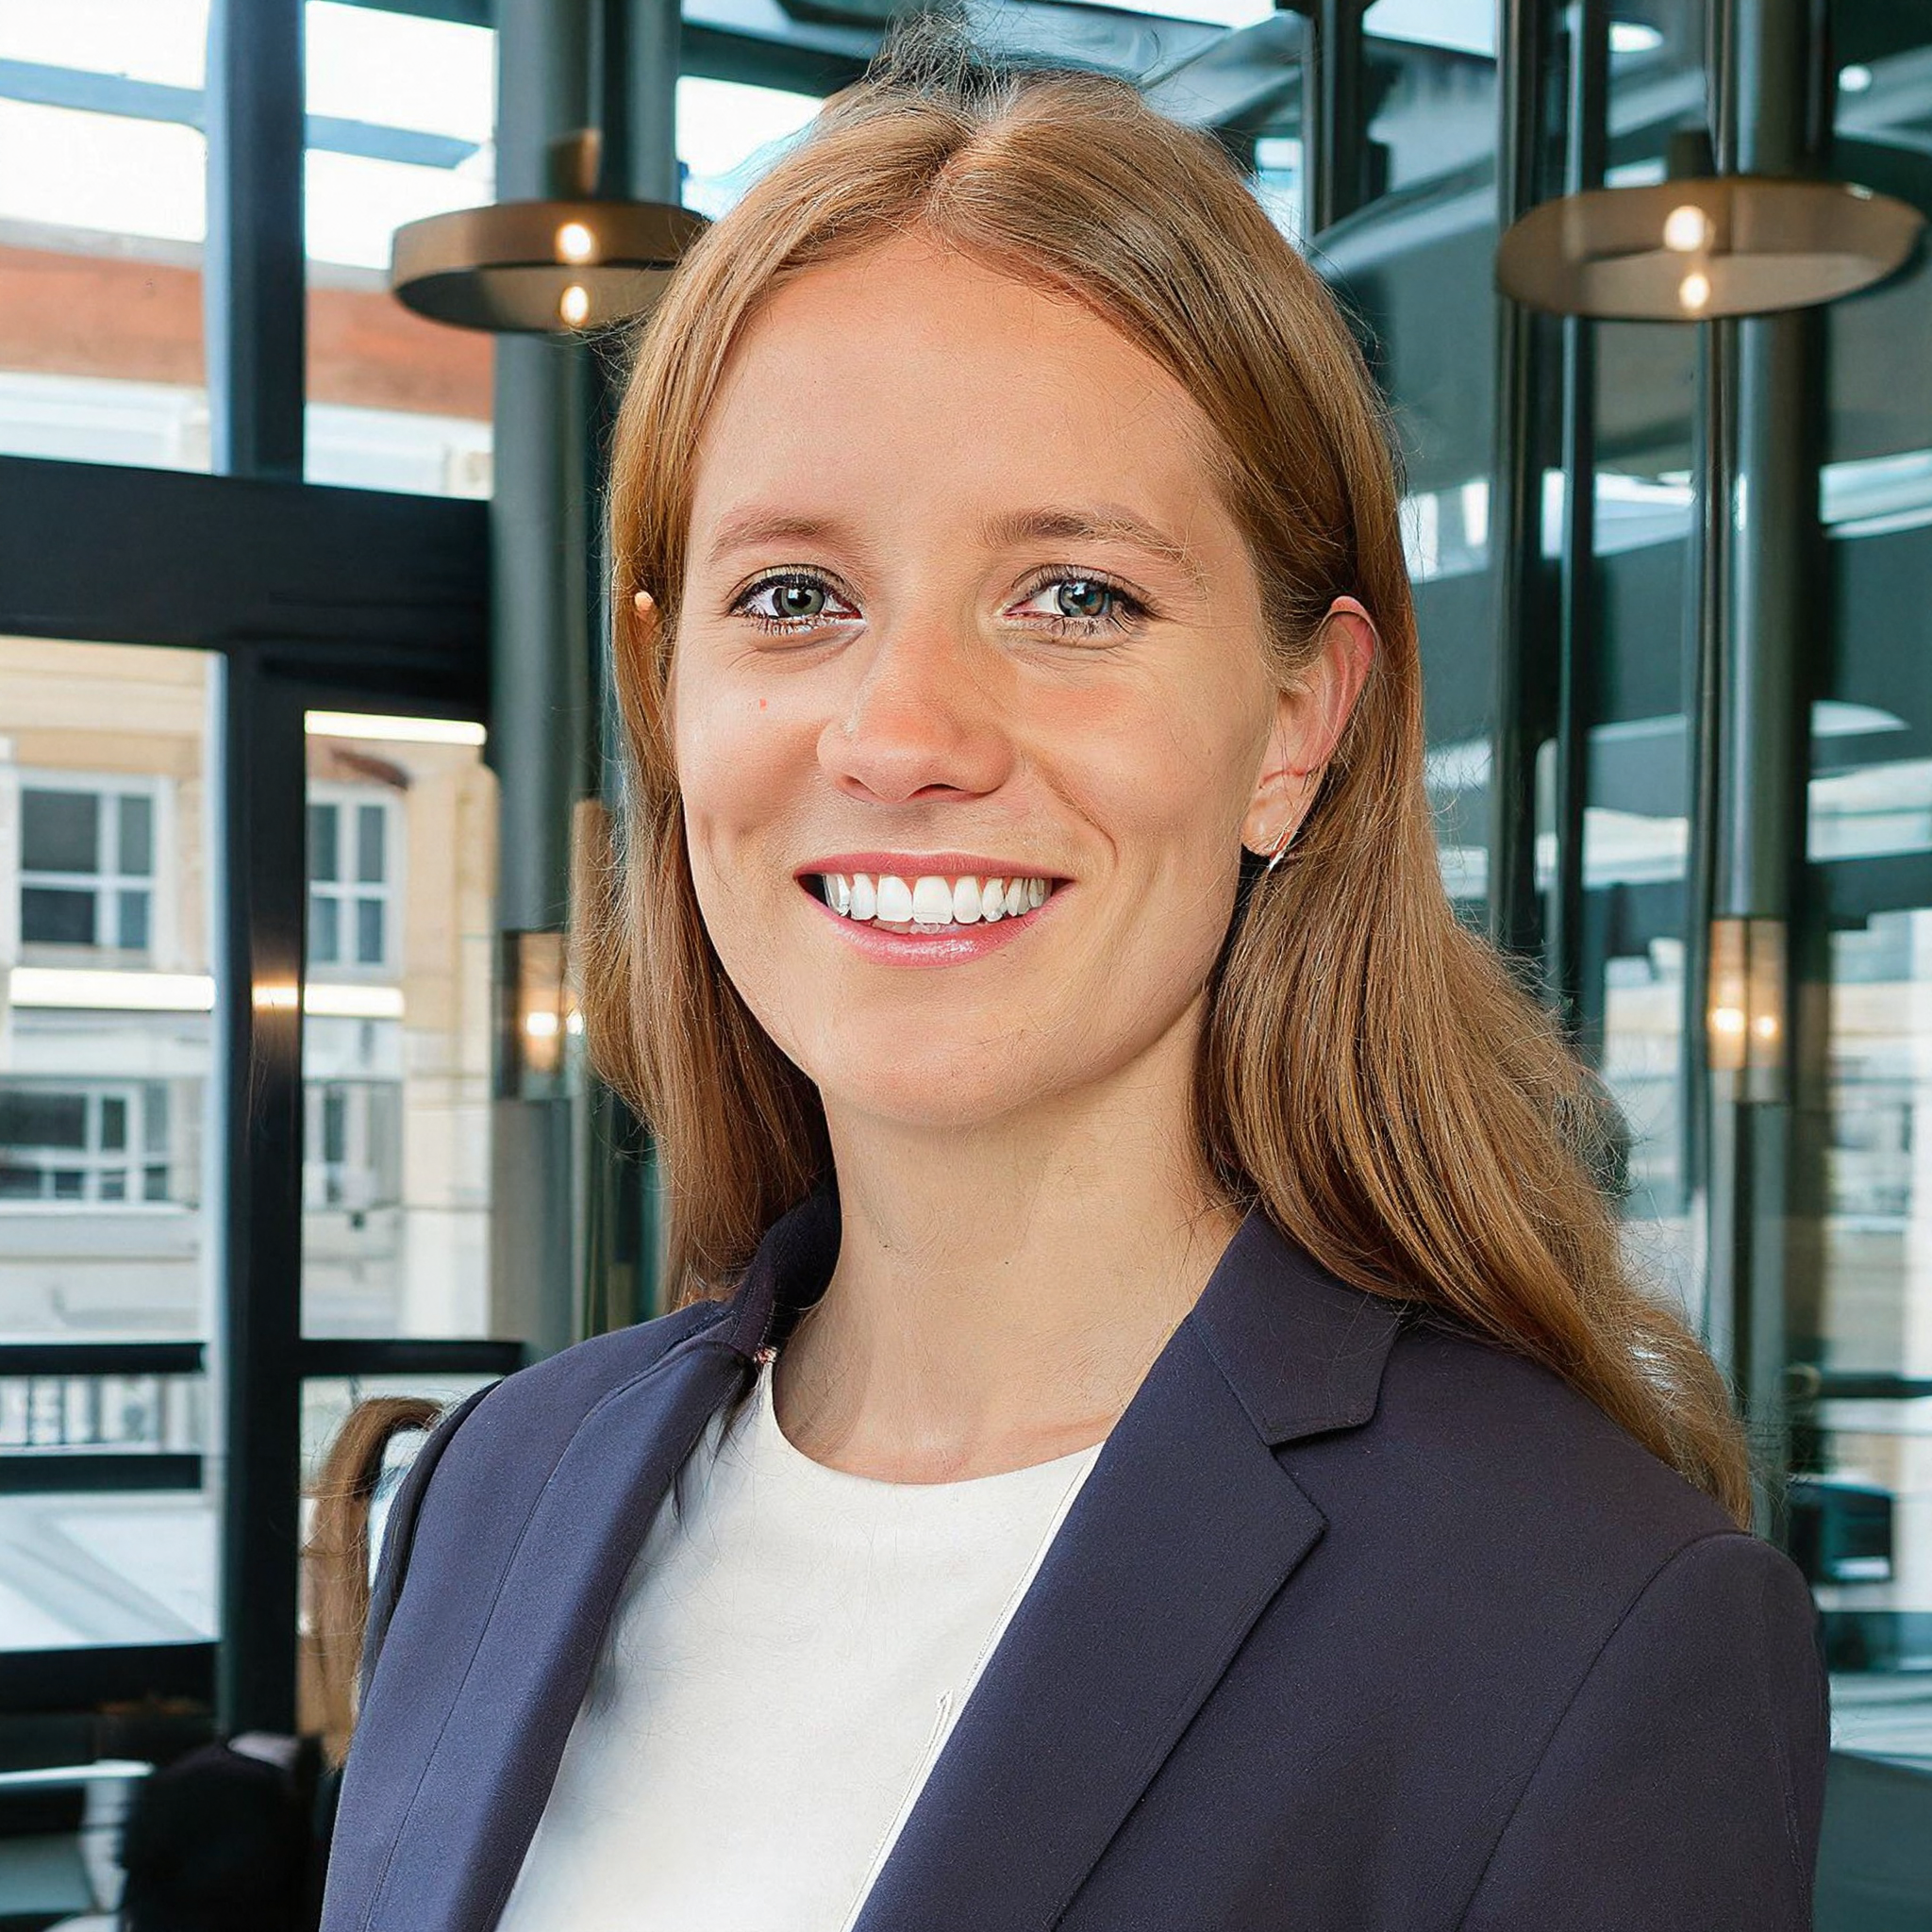

In [18]:
result